In [13]:
import numpy as np

X = []
Y = []

for line in open("./iris/iris.data", "r"):
    line = line.strip()
    if line =="": continue
    *x, y = line.split(",")
    x = [float(i) for i in x]

    X.append(x)
    Y.append(y)

labels = list(set(Y))
Y = [labels.index(i) for i in Y]

X = np.array(X)
Y = np.array(Y)

print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

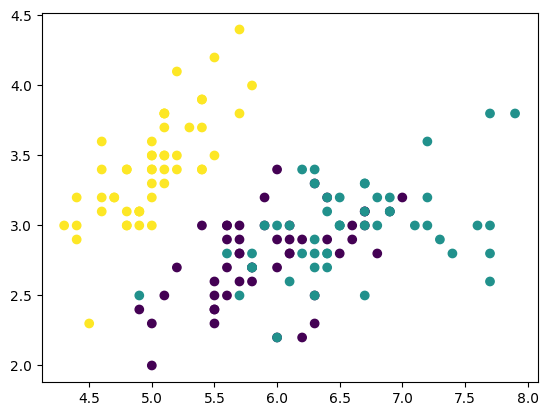

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], c=Y)

In [15]:
class KNNClassifier:
    def __init__(self, k) -> None:
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.Y = Y

    def predict(self, queries):
        Y = []
        for q in queries:
            dists = np.linalg.norm(self.X - q, axis=1)
            knns = np.argsort(dists)[:self.k]
            counts = np.bincount(self.Y[knns])
            Y.append(np.argmax(counts))
        
        return np.array(Y)

In [42]:
perm = np.random.permutation(len(X))

Xrand = X[perm]
Yrand = Y[perm]

n_trains = int(0.8*len(X))
X_train = Xrand[:n_trains]
Y_train = Yrand[:n_trains]

X_test = Xrand[n_trains:]
Y_test = Yrand[n_trains:]

knn = KNNClassifier(5)
knn.fit(X_train, Y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

print("train accuracy: ", (train_pred==Y_train).mean())
print("test accuracy: ", (test_pred == Y_test).mean())

train accuracy:  0.21666666666666667
test accuracy:  0.36666666666666664


In [ ]:
def cross_val_score(knn, X, Y, cv):
    n = len(X)
    perm = np.random.permutation(n)
    X = X[perm]
    Y = Y[perm]
    scores = []